## **Data Mining with Python**
### **Semana 3: Clustering ``DBSCAN()``**
**Andrés C. Medina Sanhueza**

PhD(c) Engineering Systems

Lead Advanced Analytics Financial Retail Cencosud-Scotiabank

anmedinas@gmail.com

<img src="https://files.realpython.com/media/SciPy-Tutorial_Watermarked_1.b9f391570601.jpg" width=700 height=400/>

---
## **Clase ``DBSCAN()``**

Para el algoritmo DBSCAN, utiliza la clase ``sklearn.cluster.DBSCAN`` como lo muestra la siguiente línea de código:


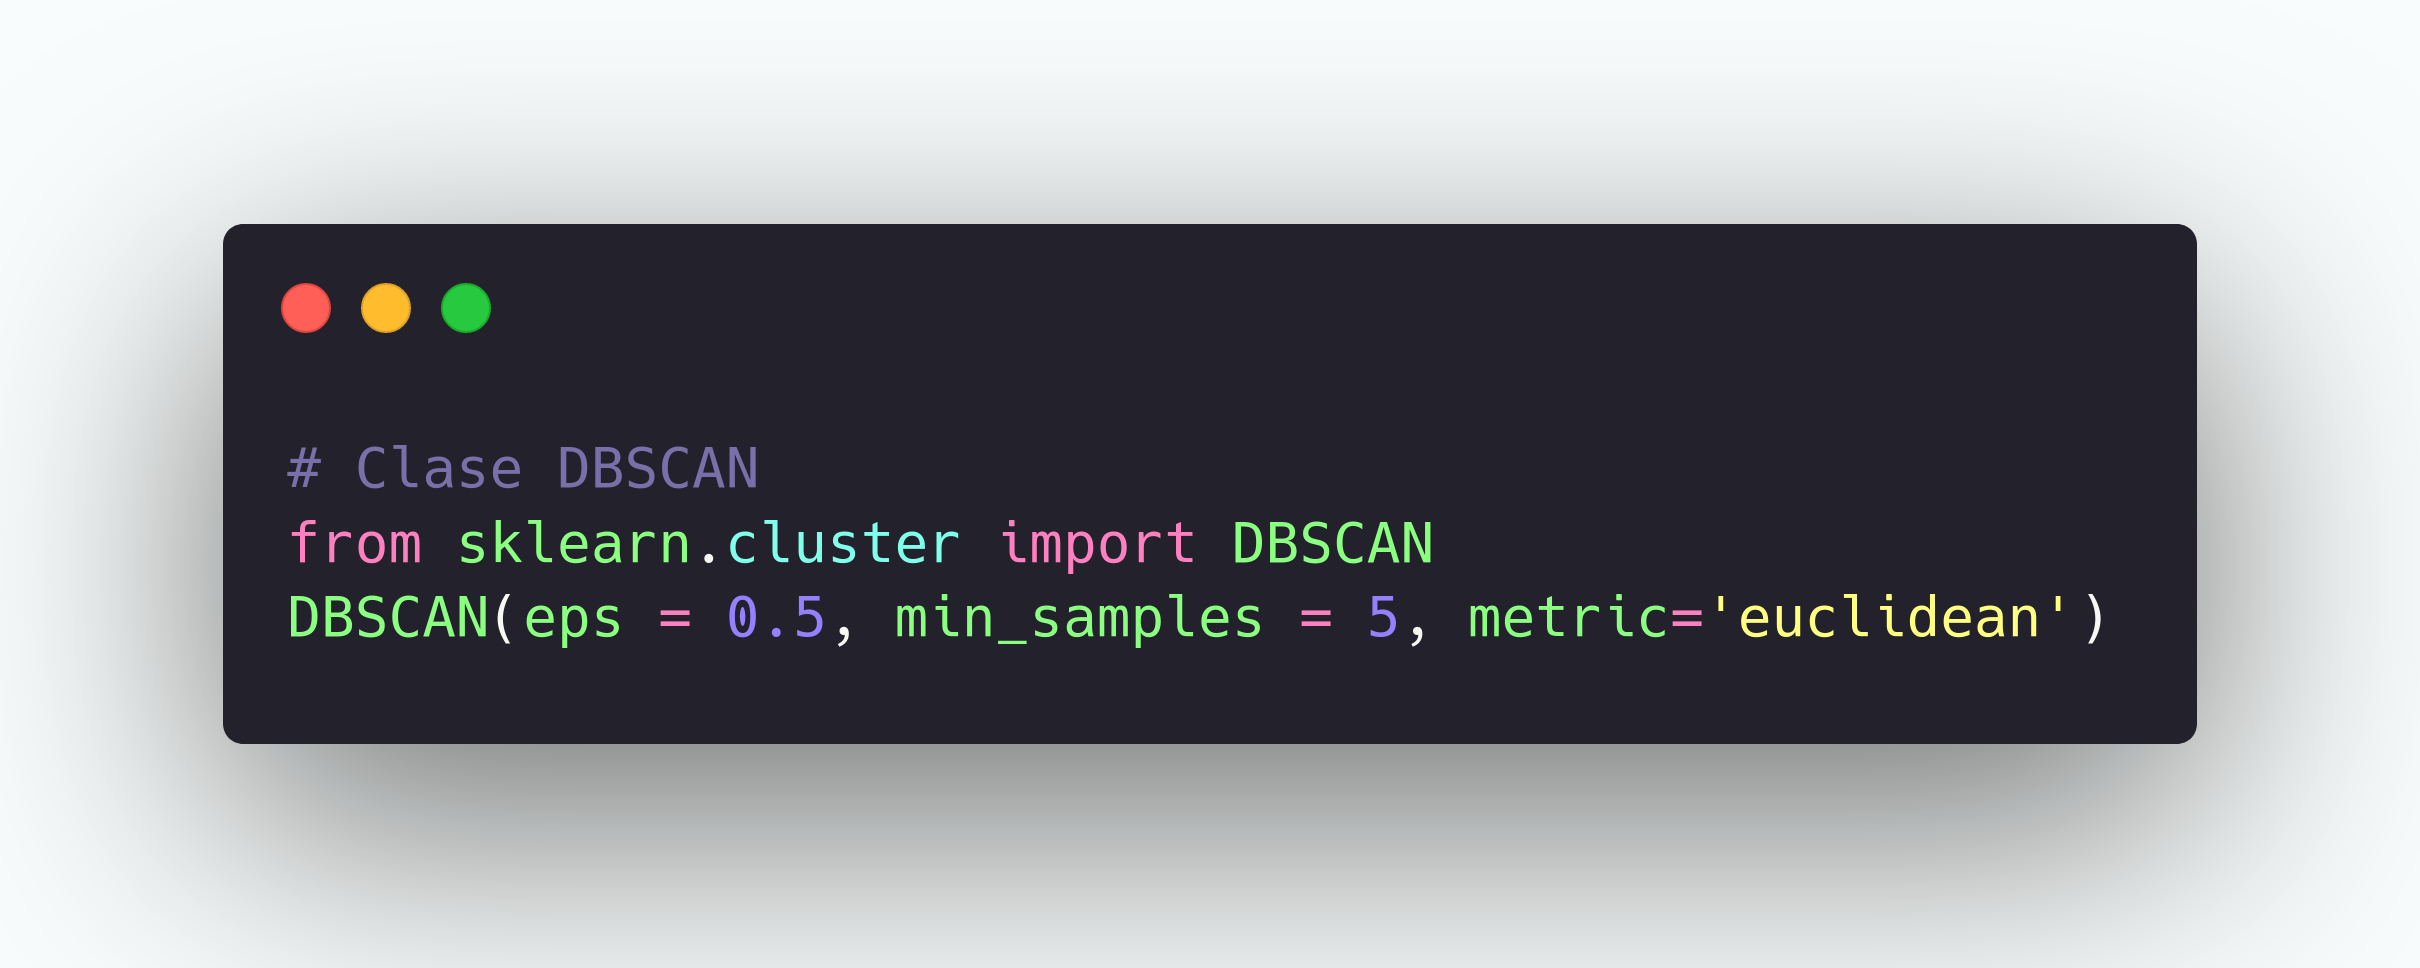

In [1]:
from IPython.display import Image
Image("dbscan.png")

Los parámetros de la clase, son las siguientes:
* ``eps:`` radio de la esfera $n$-dimensional para la cual, se buscan los ``minPts``.  
* ``minPts:`` Número mínimo de puntos dentro de la región definida por ``eps`` para considerar a un punto como crítico (el punto a analizar también se cuenta). 
* ``metric:`` métrica para el cálculo de la distancia. ``scikit_learn`` (cityblock, cosine, euclidean, manhattan). ``scipy.spatial.distances`` (chebyshev, correlation, hamming, jaccard, mahalanobis, minkowski, seuclidean, sqeuclidean).

Los atributos de la clase, son las siguientes:
* ``core_samples_indices_:`` índices de puntos core.
* ``components_:`` Copia de los puntos core.
* ``labels_:`` etiquetas de los puntos (-1 implica outlier).    

Las funciones de la clase, son las siguientes
* ``fit(X):`` Entrena el modelo con los parámetros asignados.
* ``fit_predict(X):`` Entrena y devuelve los clusters encontrados con los parámetros asignados. 

Algunas librerías que utilizaré para esta clase. 

In [2]:
from matplotlib import pyplot as plt 
from plotnine import *
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

import pandas as pd 
import numpy as np
import seaborn as sns
import warnings 

# Omite Warnings 
warnings.simplefilter("ignore")

# Configuracion Entorno Plot
sns.set_style('dark')
sns.set(rc={'figure.figsize':(5.27,5.27)})

In [3]:
# Cargo Datos 
wine = datasets.load_wine()

In [4]:
# Solo para ver que tiene el conjunto de datos
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
# Información de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [6]:
# Descripción estadística de los datos
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


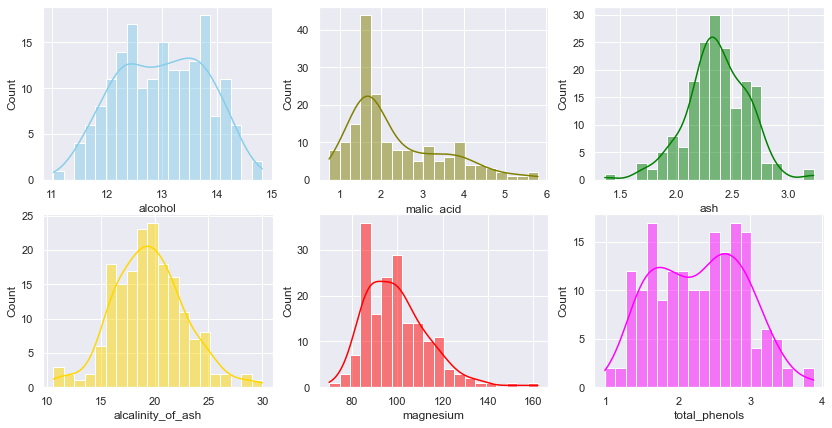

In [7]:
# Histogramas de las variables 
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.histplot(data=df, x="alcohol", kde=True, color="skyblue", ax=axs[0, 0], bins=20)
sns.histplot(data=df, x="malic_acid", kde=True, color="olive", ax=axs[0, 1], bins=20)
sns.histplot(data=df, x="ash", kde=True, color="green", ax=axs[0, 2], bins=20)
sns.histplot(data=df, x="alcalinity_of_ash", kde=True, color="gold", ax=axs[1, 0], bins=20)
sns.histplot(data=df, x="magnesium", kde=True, color="red", ax=axs[1, 1], bins=20)
sns.histplot(data=df, x="total_phenols", kde=True, color="magenta", ax=axs[1, 2], bins=20)
plt.show()

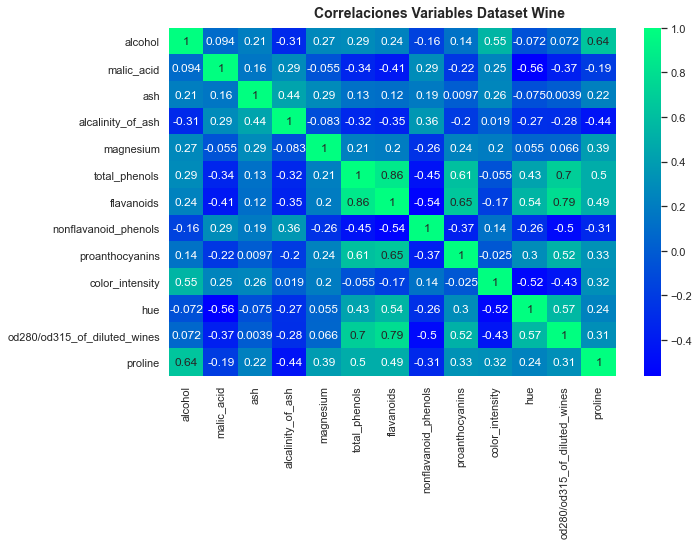

In [8]:
# Análisis de Correlación
fig, ax = plt.subplots(1, 1, figsize=(10,6))
corr = df.corr()
sns.heatmap(corr,ax = ax, cmap='winter',annot=True)
fig.subplots_adjust(top = 0.93)
fig.suptitle('Correlaciones Variables Dataset Wine', fontsize=14,fontweight='bold')
plt.show()

In [9]:
# Escalamiento de datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine.data)

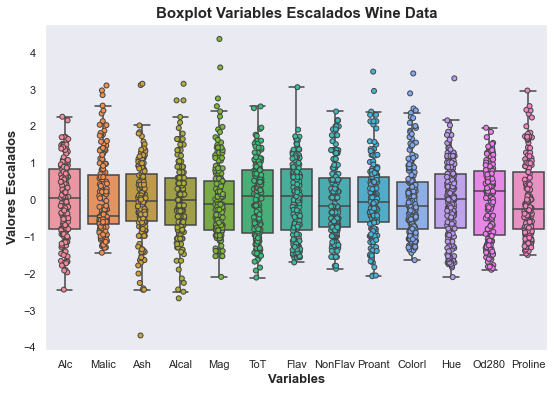

In [10]:
# Boxplot Datos Escalados 
sns.set_style('dark')
df1 = pd.DataFrame(scaled_features, columns = ['Alc','Malic','Ash','Alcal','Mag','ToT','Flav','NonFlav','Proant','ColorI','Hue','Od280','Proline'])
plt.figure(figsize=(9,6))
ax = sns.stripplot(x="variable", y="value", data=pd.melt(df1), jitter=True, split=True,
              linewidth = 1, edgecolor='gray')
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df1),fliersize=0)
ax.set_xlabel("Variables", fontsize=13,fontweight='bold')
ax.set_ylabel("Valores Escalados", fontsize=13,fontweight='bold')
ax.set_title("Boxplot Variables Escalados Wine Data", fontsize=15,fontweight='bold')
plt.show()

In [11]:
# Creando Objeto de DBSCAN con condiciones iniciales 
DB = DBSCAN(eps = 2 , min_samples = 4)

# Entreno el modelo
DB = DB.fit(scaled_features)

In [12]:
# Muestro las etiquetas aprendidas
print(DB.labels_)

[ 0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0 -1  0  0
  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0 -1  0 -1  0 -1 -1  0
  0  0 -1  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1  0  0  0  0  0  0  0  0 -1 -1 -1
 -1  0 -1 -1 -1  0  0  0  0 -1  0  0  0 -1 -1  0 -1  0  0 -1  0  0 -1 -1
  0 -1 -1 -1 -1  0  0 -1  0 -1 -1  1  1  1  2  2 -1 -1  2  3  3 -1  3  2
 -1  1 -1  4  4  5  5  5 -1  4  2  4  4 -1 -1 -1  4  3  3  1  4  2  4  4
  4 -1  1  4  4  4  4  5 -1 -1]


In [13]:
# Mostrando los puntos CORES (notar que varios puntos no fueron considerados)
print(DB.core_sample_indices_)

[  0   3   5   6   8   9  11  12  15  16  17  20  22  23  24  26  27  28
  29  31  34  35  36  37  38  40  44  47  48  49  51  52  53  54  55  56
  57  58  81  82  85  86  88  90  91  92  97 101 102 104 106 107 114 116
 125 128 131 135 138 139 140 142 147 148 149 156 161 162 163 164 167 172
 173 174]


In [14]:
# Creando el Objeto y Aplicando PCA 
pca = PCA(n_components = 2)
pca.fit(scaled_features)
tmpData = pca.transform(scaled_features)
tmpData = pd.DataFrame(tmpData, columns=["PC1", "PC2"])
tmpData["labels"] = DB.labels_

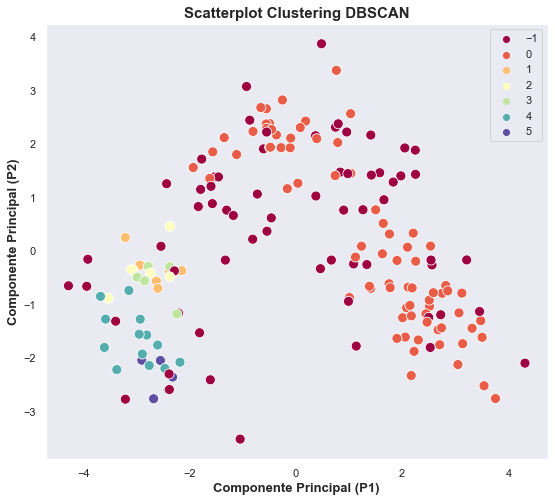

In [15]:
plt.figure(figsize=(9,8))
ax = sns.scatterplot(data = tmpData, x="PC1", y="PC2", hue="labels", palette="Spectral", s=100)
ax.set_xlabel("Componente Principal (P1)", fontsize=13,fontweight='bold')
ax.set_ylabel("Componente Principal (P2)", fontsize=13,fontweight='bold')
ax.set_title("Scatterplot Clustering DBSCAN", fontsize=15,fontweight='bold')
ax.legend() 
plt.show()

## **Clase NearestNeighbors()**

Para calcular las distancias de los vecinos, se utiliza la siguiente instrucción.

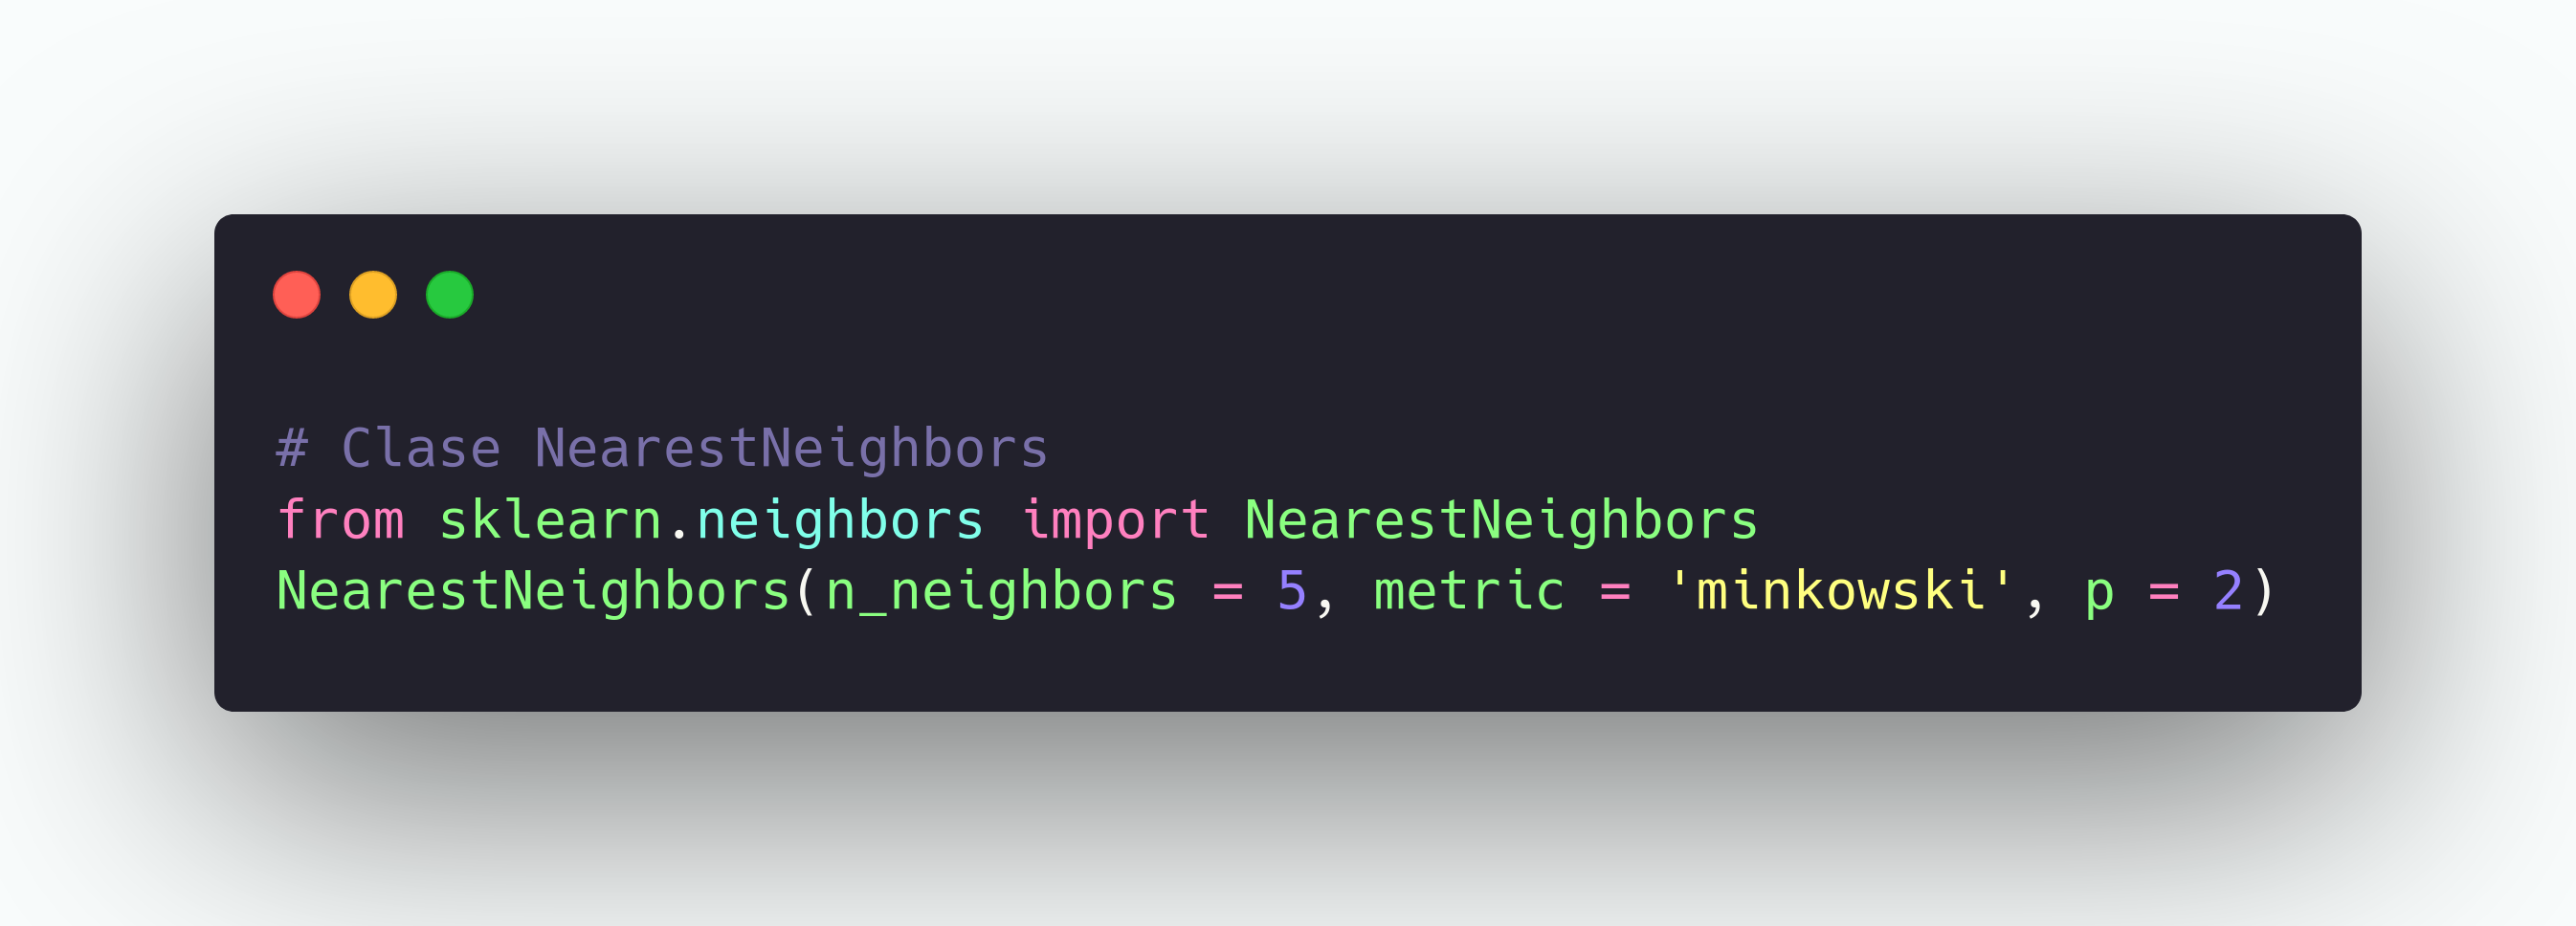

In [16]:
Image("n_neighbors.png")

Los parámetros de esta clase son:

* ``n_neighbors:`` Números de vecinos a estimar.
* ``metric:`` métrica para el cálculo de la distancia.
* ``p:`` parámetro de la distancia de minkowski (2 es euclideana). 

Los atributos de esta clase son:
* ``effective_metric_:``  Métrica usada para el cálculo de la distancia.
* ``effective_metric_params_:`` Parámetros de la métrica usada para el cálculo de la distancia.
* ``n_samples_fit_:``Número de puntos del dataset.

Las funciones de la clase, son las siguientes
* ``fit(X):`` Encontrar los vecinos más cercanos de los datos..
* ``kneighbors(X, n_neighbors):`` Encontrar los $K$ vecinos más cercano de un punto, retorna tanto los índices como la distancia.
* ``radius_neighbors(X, radius):`` Encontrar los vecinos de uno o más puntos que se encuentran dentro de un radio determinado.

In [17]:
from sklearn.neighbors import NearestNeighbors
numNeighboors = 4 

# Creo el modelo
neighbors = NearestNeighbors(n_neighbors = numNeighboors)

# Entreno el modelo
neighbors_fit = neighbors.fit(scaled_features) 

# Buscando vecinos más cercanos
distances, indices = neighbors_fit.kneighbors(scaled_features) 
distances = distances[:, numNeighboors-1]
distances.sort()

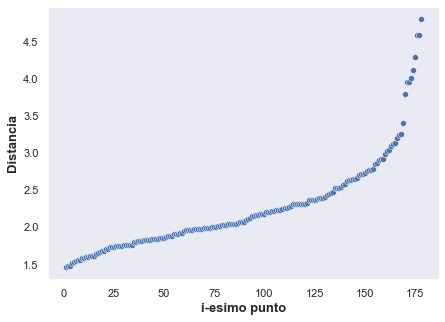

In [18]:
# Creo Variables para plotear
x  = range(1, len(distances) + 1)
y  = distances 

# Creo DataFrames y concateno columnas
df = pd.DataFrame(np.column_stack((x,y)), columns=["x","distances"])

# Visualización
plt.figure(figsize=(7,5))
ax = sns.scatterplot(data = df, x = "x", y = "distances")
ax.set_xlabel("i-esimo punto", fontsize=13,fontweight='bold')
ax.set_ylabel("Distancia", fontsize=13,fontweight='bold')
plt.show()

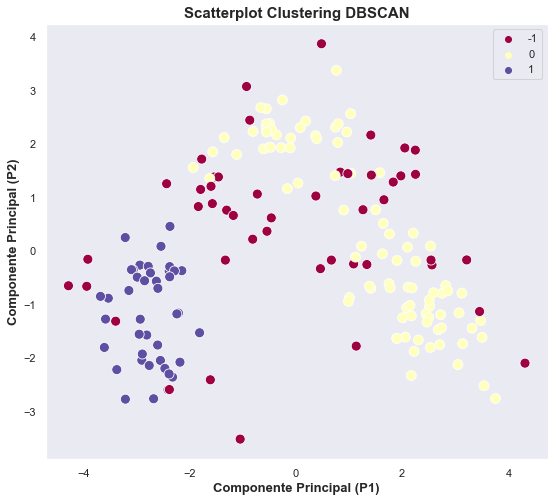

In [19]:
# Creando Objeto DBSCAN con condiciones iniciales
DB  = DBSCAN(eps = 2.2, min_samples=4)
DB  = DB.fit(scaled_features)
pca = PCA(n_components=2)
pca.fit(scaled_features)

tmpData = pca.transform(scaled_features)
tmpData = pd.DataFrame(tmpData,columns=["PC1","PC2"])
tmpData["labels"] = DB.labels_

plt.figure(figsize=(9,8))
ax = sns.scatterplot(data = tmpData, x="PC1", y="PC2", hue="labels", palette="Spectral", s=100)
ax.set_xlabel("Componente Principal (P1)", fontsize=13,fontweight='bold')
ax.set_ylabel("Componente Principal (P2)", fontsize=13,fontweight='bold')
ax.set_title("Scatterplot Clustering DBSCAN", fontsize=15,fontweight='bold')
ax.legend() 
plt.show()

In [20]:
# Genero Copia de datos para pegar flag
df2 = df1.copy()

# Pego las Etiquetas al conjunto de datos
df2["labels"] = DB.labels_

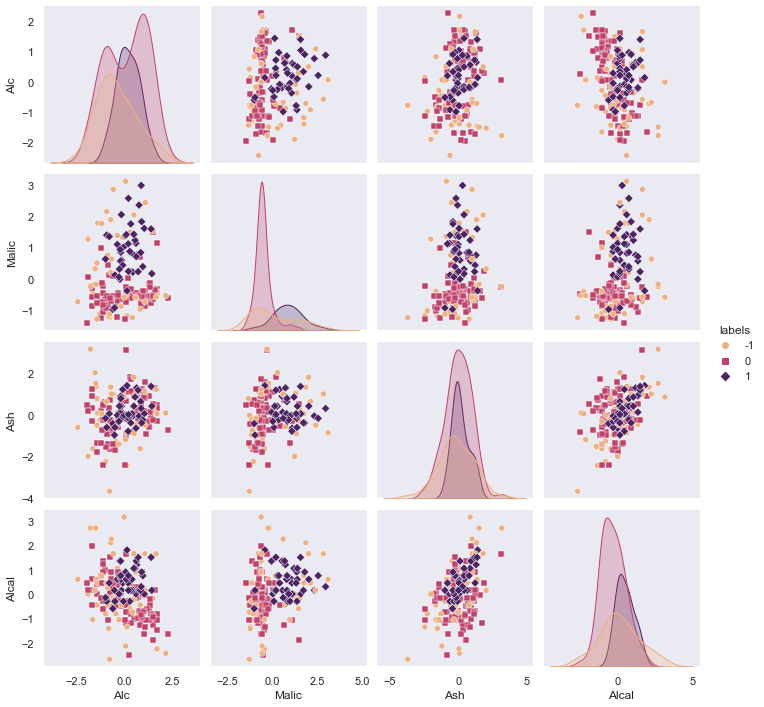

In [21]:
# Pairplot con algunas columnas
sns.pairplot(df2[['Alc', 'Malic', 'Ash', 'Alcal','labels']], 
             hue="labels", markers=["o", "s", "D"],
             palette='flare')
plt.show()